In [451]:
import pandas as pd
import numpy as np
import math
import warnings
from IPython.display import display
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

df = pd.read_csv('ny.csv')
df.head(20)
df.columns = (['City', 'Population', 'Violent Crime', 'Murder', 'Rape1', 'Rape', 'Robbery', 'Aggravated Assault',
               'PropertyCrime', 'Burglary', 'Larceny', 'MV Theft', 'Arson'])
df = df[['PropertyCrime','Population', 'Murder', 'Robbery']].copy()
df.head(6)


,PropertyCrime,Population,Murder,Robbery
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,Property\ncrime,Population,Murder and\nnonnegligent\nmanslaughter,Robbery
4,12,"1,861",0,0
5,24,"2,577",0,0


In [452]:
df = df.iloc[4:352]
df["Population"] = df["Population"].str.replace(",", "").astype(int)
df["PropertyCrime"] = df["PropertyCrime"].str.replace(",", "").astype(int)
df["Robbery"] = df["Robbery"].str.replace(",", "").astype(int)


df = df.apply(pd.to_numeric)
missing_value = df.isnull().sum()
print(missing_value[:])
df.head(5)

PropertyCrime    0
Population       0
Murder           0
Robbery          0
dtype: int64


,PropertyCrime,Population,Murder,Robbery
4,12,1861,0,0
5,24,2577,0,0
6,16,2846,0,0
7,4090,97956,8,227
8,223,6388,0,4


In [453]:
df['Population2'] = df['Population']**2
df['Robbery2'] = df['Robbery']**2

In [454]:
df.drop(df[df.Population >150000].index, inplace=True)
df.sort_values(by=['Population'], ascending = False).head(5)

,PropertyCrime,Population,Murder,Robbery,Population2,Robbery2
314,6473,143834,21,400,20688219556,160000
11,2118,118296,1,31,13993943616,961
7,4090,97956,8,227,9595377936,51529
130,2303,96667,0,60,9344508889,3600
271,567,87204,2,9,7604537616,81


In [455]:
df['Murder'] = df['Murder'].apply(lambda x: 1 if x >=1 else 0)

In [456]:
df.head(5)

,PropertyCrime,Population,Murder,Robbery,Population2,Robbery2
4,12,1861,0,0,3463321,0
5,24,2577,0,0,6640929,0
6,16,2846,0,0,8099716,0
7,4090,97956,1,227,9595377936,51529
8,223,6388,0,4,40806544,16


## Model with all variables

In [457]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['PropertyCrime'].values.reshape(-1, 1)
X = df[['Population','Murder','Robbery', 'Population2', 'Robbery2']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  1.28815725e-02   1.96438735e+01   6.94562668e+00   6.10396381e-08
    6.82808651e-04]]

Intercept: 
 [ 24.8612488]

R-squared:
0.868389532603


## Transform Property Crime by square root and Squared

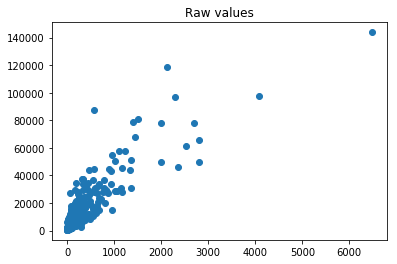

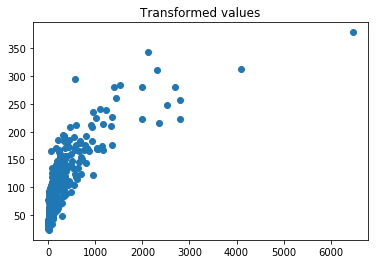

In [458]:
# Plot the data as-is
plt.scatter(df['PropertyCrime'], df['Population'])
plt.title('Raw values')
plt.show()

# Create a feature using a non-linear transformation.
sqrt_feature = [math.sqrt(x) for x in  df['Population']]



# Plot data with transformed features
plt.scatter(df['PropertyCrime'], sqrt_feature)
plt.title('Transformed values')
plt.show()

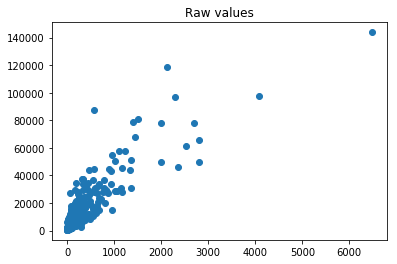

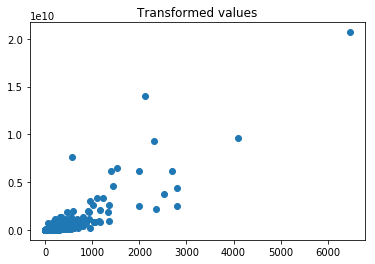

In [459]:
# Plot the data as-is
plt.scatter(df['PropertyCrime'], df['Population'])
plt.title('Raw values')
plt.show()


# Plot data with feature squared
plt.scatter(df['PropertyCrime'], df['Population2'])
plt.title('Transformed values')
plt.show()

## Transform Robbery (Square Root and Squared)

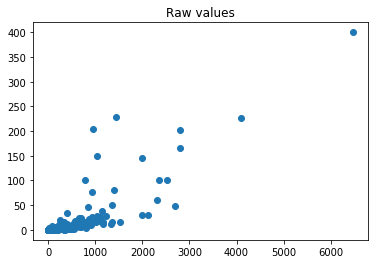

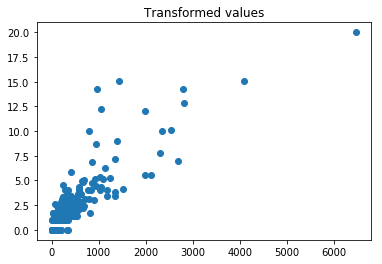

In [478]:
# Plot the data as-is
plt.scatter(df['PropertyCrime'], df['Robbery'])
plt.title('Raw values')
plt.show()

# Create a feature using a non-linear transformation.
sqrt_feature = [math.sqrt(x) for x in  df['Robbery']]



# Plot data with transformed features
plt.scatter(df['PropertyCrime'], sqrt_feature)
plt.title('Transformed values')
plt.show()

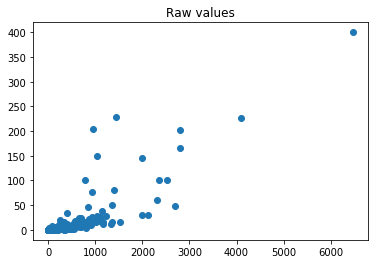

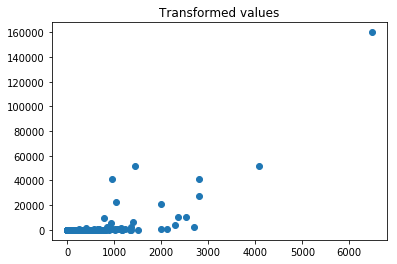

In [479]:
# Plot the data as-is
plt.scatter(df['PropertyCrime'], df['Robbery'])
plt.title('Raw values')
plt.show()

# Plot data with transformed features
plt.scatter(df['PropertyCrime'], df['Robbery2'])
plt.title('Transformed values')
plt.show()

## Explore mulitvariate normality and homoscedacity

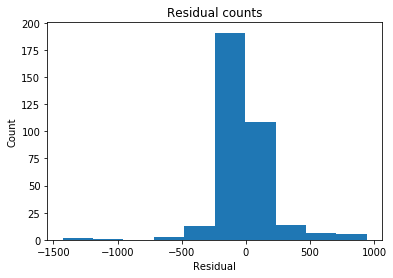

In [462]:
#X = df[['Population','Murder','Robbery', 'Population2', 'Robbery2']]

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = df['PropertyCrime']

# Calculate the error, also called the residual.
residual = actual - predicted

# Hist plot of residuals
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

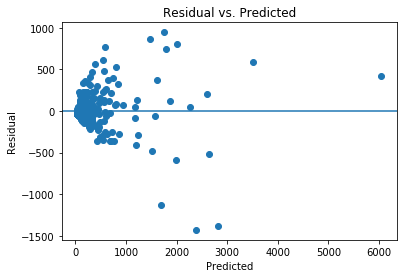

In [463]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


In [465]:
correlation_matrix = X.corr()
display(correlation_matrix)

,Population,Murder,Robbery,Population2,Robbery2
Population,1.000,0.498,0.685,0.898,0.549
Murder,0.498,1.000,0.488,0.389,0.335
Robbery,0.685,0.488,1.000,0.717,0.906
Population2,0.898,0.389,0.717,1.000,0.709
Robbery2,0.549,0.335,0.906,0.709,1.000


## Model I settled on

In [481]:
regr = linear_model.LinearRegression()
Y = df['PropertyCrime'].values.reshape(-1, 1)
X = df[['Murder','Population2','Robbery']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  1.41017956e+02   1.73954454e-07   7.17637308e+00]]

Intercept: 
 [ 127.13262047]

R-squared:
0.842187910491


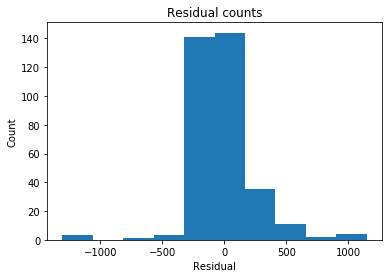

In [482]:
#X = df[['Murder','Population2','Robbery']]
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = df['PropertyCrime']

# Calculate the error, also called the residual.
residual = actual - predicted

# Hist plot of residuals
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

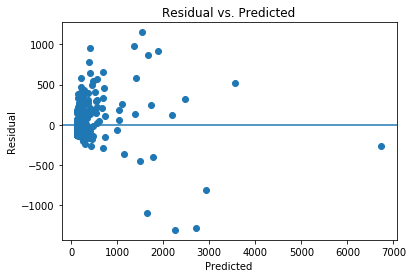

In [483]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


In [484]:
correlation_matrix = X.corr()
display(correlation_matrix)

,Murder,Population2,Robbery
Murder,1.000,0.389,0.488
Population2,0.389,1.000,0.717
Robbery,0.488,0.717,1.000


Initially, I removed cities over 150,000 in population to reduce my population variance(this removed 3 cities). My initial model from the previous assignment(with robbery as a binary categorical) was giving me a -7 intercept which didn't intuitively make sense to me and gave me an R2 of .76

I decided to leave the robbery column as a continuous variable and explored the linearity of the Population and Robbery features. Unfortunately, neither the raw or transformed features(both the sqrt and square) seemed to help the linearity of the relationship to my outcome. 

The error from all 3 of my potential models had some right skew to them. I tried correcting this by squaring and taking the sqaure of the continous independant variables (Population and Robbery), but it didn't noticeably help the normality or homoscedacity. 

Even though my final model has a stronger correlation between Robbery and Population2,the I would like, it explained 84% of the variance in the PropertyCrime and the intercept, directions and powers of the coefficenets for each dependent variable made intuitive sense.



